# Quiz 3 - Harris detector

### Matheus Pimenta

O objetivo desse trabalho é implementar o algoritmo *Harris Detector*, e comparar os resultados com os valores reais e com os geraldos pelo algorítmo próprio da OpenCV.

## Configurações iniciais

In [1]:
import sys
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

A imagem utilizada sera de um tabuleiro.

Em testes iniciais, os algoritmos estavam pegando bastante ruido. Em pesquisas sobre, é recomentador usar um filtro Gaussiano antes de começar o algoritmo, para já tratar a imagem

Text(0.5, 1.0, 'Tabuleiro usado no algoritmo')

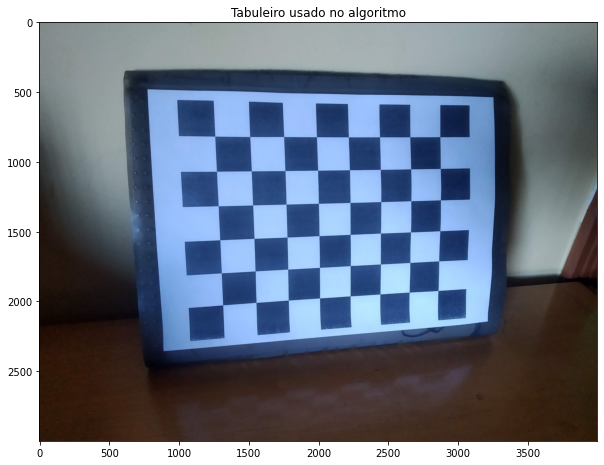

In [2]:
tabuleiro = cv.imread('tabuleiro_1.jpg')
tabuleiro = cv.GaussianBlur(tabuleiro, (5, 5), 0)
tabuleiro_img = cv.cvtColor(tabuleiro, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(tabuleiro_img)
plt.title('Tabuleiro usado no algoritmo')
# plt.minorticks_on()

Passando a imagem para preto e branco:

Text(0.5, 1.0, 'Tabuleiro - escala de cinza')

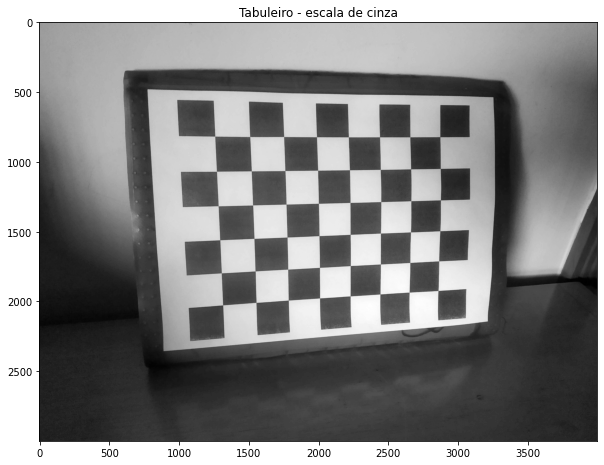

In [3]:
tabuleiro_gray = cv.cvtColor(tabuleiro, cv.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(tabuleiro_gray, cmap='gray')
plt.title('Tabuleiro - escala de cinza')

## Obtendo quinas reais da imagem 

Os pontos reais das quinas foram obtidos via imshow do cv2. Enquanto nenhuma tecla é pressionada,no canto da imagem é possível ver as coordenadas do mouse, e portanto pegar os pontos.

Segue o código comentado, pois depois de uma tecla pressionada ela acaba travando, impedindo o fluxo normal.

In [4]:
# cv.namedWindow("output", cv.WINDOW_NORMAL)
# img = cv.imread('tabuleiro_1.jpg')
# cv.imshow("output", img)
# cv.waitKey(0)
# cv.destroyAllWindows() 

Os pontos obtidos foram:

Text(0.5, 1.0, 'Tabuleiro com quinas marcadas')

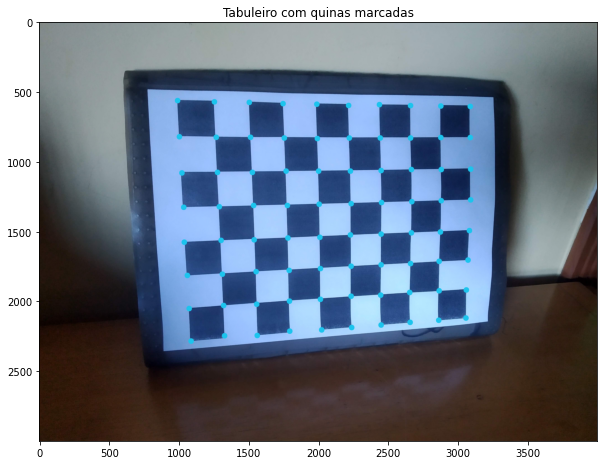

In [5]:
corners_points = [
    # 1 coluna
    [993,562],
    [1006,821],
    [1024,1080],
    [1037,1326],
    [1041,1576],
    [1063,1814],
    [1076,2051],
    [1090,2284],
    # 2 coluna
    [1257,571],
    [1270,825],
    [1279,1076],
    [1292,1322],
    [1305,1563],
    [1314,1805],
    [1323,2029],
    [1330,2246],
    # 3 coluna
    [1507,575],
    [1516,825],
    [1529,1076],
    [1538,1313],
    [1542,1559],
    [1556,1787],
    [1560,2020],
    [1564,2244],
    # 4 coluna
    [1749,584],
    [1758,830],
    [1771,1067],
    [1780,1313],
    [1784,1546],
    [1793,1778],
    [1795,1998],
    [1797,2213],
    # 5 coluna
    [1991,588],
    [1995,834],
    [2004,1067],
    [2008,1304],
    [2013,1541],
    [2017,1765],
    [2017,1985],
    [2026,2204],
    # 6 coluna
    [2219,597],
    [2224,830],
    [2232,1067],
    [2237,1300],
    [2232,1524],
    [2237,1748],
    [2237,1963],
    [2241,2187],
    # 7 coluna
    [2440,591],
    [2446,830],
    [2452,1063],
    [2455,1292],
    [2452,1518],
    [2452,1738],
    [2449,1955],
    [2452,2169],
    # 8 coluna
    [2663,598],
    [2663,830],
    [2669,1056],
    [2672,1286],
    [2669,1509],
    [2663,1729],
    [2657,1936],
    [2660,2150],
    # 9 coluna
    [2880,601],
    [2880,827],
    [2883,1056],
    [2883,1279],
    [2877,1503],
    [2868,1713],
    [2868,1924],
    [2865,2135],
    # 10 coluna
    [3091,604],
    [3091,827],
    [3094,1053],
    [3094,1273],
    [3085,1493],
    [3075,1704],
    [3063,1918],
    [3060,2119] 
]

tab_aux = tabuleiro_img.copy()

for x,y in corners_points:
    cv.circle(tab_aux, (x, y), 20, (27, 196, 237), -1)

plt.figure(figsize=(10,10))
plt.imshow(tab_aux)
plt.title('Tabuleiro com quinas marcadas')



## Implementaao do algoritmo Harris detector

Esse algoritmo foi implementado seguindo os passos do livro do *Truco e Verri*, p. 84, bem como as aulas da disciplina.

Para fazer as convoluções tanto do Sobel quanto do Gaussiano, foram utilizadas as seguintes funções da OpenCV: cv2.Sobel e cv2.GaussianBlur.

A escala para o Sobel foi escolhida partindo de valores padrão (1/8, 1/16, ...), e realizando testes para escolher a com melhores resultados.

### 1 passo: derivadas da imagem

In [6]:
def get_derivates(image):
    scale = 0.125

    delta = 0
    ddepth = cv.CV_16S


    Ix = cv.Sobel(image, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    Iy = cv.Sobel(image, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)

    return Ix, Iy


### 2 passo: gerar produtos das derivadas

In [7]:

def generate_derivates_product(Ix, Iy):
    Ix2 = Ix*Ix
    Iy2 = Iy*Iy
    Ixy = Ix*Iy

    return Ix2, Iy2, Ixy


### 3 passo: passar filtro Gaussiano para melhorar a qualidaed

In [8]:

def guaussian_filter(Ix2, Iy2, Ixy):
    Sx2 = cv.GaussianBlur(Ix2,(5,5), 0)
    Sy2 = cv.GaussianBlur(Iy2,(5,5), 0)
    Sxy = cv.GaussianBlur(Ixy,(5,5), 0)

    return Sx2, Sy2, Sxy


### 4 e 5 passo: montar matriz M e matriz de resposta R

In [9]:

def calculate_harris(Sx2, Sy2, Sxy):
    R = np.zeros((Sx2.shape[0], Sy2.shape[1]))
    k = 0.06

    for i in range(Sx2.shape[0]):
        for j in range(Sy2.shape[1]):
            M = [[Sx2[i][j], Sxy[i][j]], [Sxy[i][j], Sy2[i][j]]]
            R[i][j] = np.linalg.det(M) - k*np.trace(M)**2

    return R


    # Pegando o resultado para usar depois
    # result = []

    # for i in range(len(R)):
    #     for j in range(len(R[i])):
    #         if(R[i][j] > 0):
    #             result.append([i,j])


### 6 passo: linearizar resposta

No caso dessas imagens, a supressão de não máximo não foi necessária. Ajustando valores dos filtros jáo não ocorreram situações onde ocorreram um agrupamen

In [10]:

def calculate_threshold(R):
    threshold = np.where(R >= 0.1 * R.max())

    return threshold


### 7 passo: Supressão de não-máximo

A estratégia aqui foi pegar todos os pontos obtidos até o momento, e comparar se a distância entre eles é menor que 5. Se for, vamos escolher apenas 1 deles. Como ordenamos de forma decrescente, escolheremos sempre o melhor ponto.

In [11]:
def nonmax_supression(threshold):
    lista = []
    for pt in zip(*threshold[::-1]):
        lista.append(pt)

    lista.sort(reverse=True)


    #Mark unwanted neighbors based on Window Size

    lista2 = []

    for e in lista:
        lista2.append([e,0])

    for i in lista2:
        if i[1] != 1:
            for j in lista2:
                if j[1] != 1:
                    dist = np.sqrt((j[0][0] - i[0][0])**2 + (j[0][1] - i[0][1])**2)
                    if (dist <= 5 and dist > 0):
                        j[1] = 1
            

    final = filter(lambda x: x[1] == 0, lista2) 
    final = list(final)

    nonmaxsup = []
    for pt, index in final:
        nonmaxsup.append(pt)

    # print(len(lista)) -> imagem sem ruido = 1490
    # print(len(nonmaxsup)) -> imagem sem ruido = 151

    return nonmaxsup



E com isso finalizamos nosso algoritmo, com os seguintes resultados:

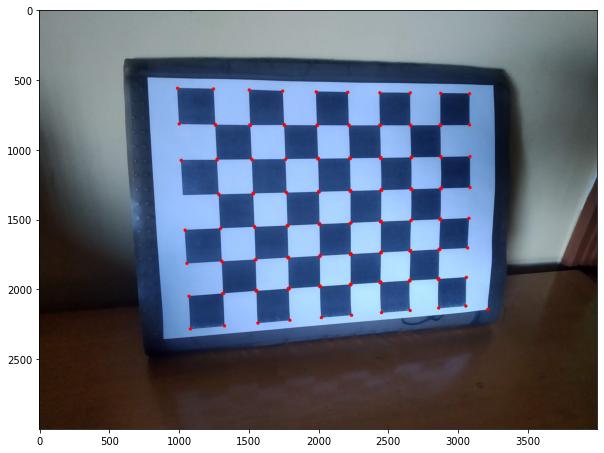

In [12]:
def harris_alg(img):
    Ix, Iy = get_derivates(img)
    Ix2, Iy2, Ixy = generate_derivates_product(Ix, Iy)
    Sx2, Sy2, Sxy = guaussian_filter(Ix2, Iy2, Ixy)
    R = calculate_harris(Sx2, Sy2, Sxy)
    t = calculate_threshold(R)
    l =nonmax_supression(t)

    return l


alg_points = harris_alg(tabuleiro_gray)

tab_for_harris = tabuleiro_img.copy()

for pt in alg_points:
    cv.circle(tab_for_harris, pt, 12, (255, 0, 0), -1)

plt.figure(figsize=(10,10))
plt.imshow(tab_for_harris)
plt.show()

## Medindo robustes da implementação



Agora vamos avaliar como o algoritmo se da bem inserindo ruido na imagem, com um filtro Gaussiano. Para isso, vamos definir algumas funções, começando por uma que adiciona ruido na imagem:

In [30]:
def gausian_noise(image, mean=0, sigma=0.001):

    image = np.array(image/255, dtype=float)
    noise = np.random.normal(mean, sigma*0.1, image.shape)
    out = image + noise
    if out.min() < 0:
        low_clip = -1.
    else:
        low_clip = 0.
    out = np.clip(out, low_clip, 1.0)
    out = np.uint8(out*255)

    return out

Agora, uma para calcular o erro entre os pontos obtidos pelo algoritmo com os pontos reais. Para isso, primeiro calculamos a distância de um ponto obtido pelo ponto real mais próximo, e então calcular esse erro.

Perceba que calculamos esse erro para cada um dos pontos reais, para penalizar o algoritmo caso não encontre alguma quina.


In [33]:
def get_error_alg_real_points(alg_points, real_points):
    errors = []
    min_dist = 123456789

    for pt_real in real_points:
        closest = alg_points[0]

        for pt_alg in alg_points:
            dist = np.sqrt((pt_real[0] - pt_alg[0])**2 + (pt_real[1] - pt_alg[1])**2)

            if dist < min_dist:
                closest = pt_alg
                min_dist = dist
                
        errors.append(np.sqrt((closest[0] - pt_real[0])**2 + (closest[1] - pt_real[1])**2))

    return errors

Por fim, uma função que calcule o RMS

In [44]:
def rms(errors):
    
    aux = 0
    
    for elem in errors:
        aux += elem*elem
    
    aux2 = aux/len(errors)
    result = np.sqrt(aux2)

    return result

Com isso, vamos gerar imagens com diferentes intensidades de ruido, e ver como o algoritmo se sai

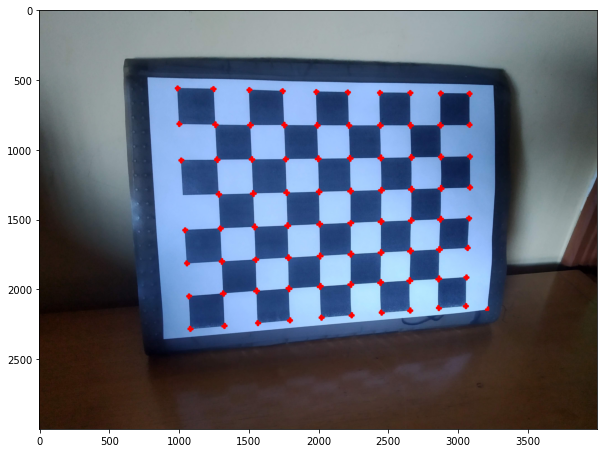

KeyboardInterrupt: 

In [35]:
rms_data = []

for i in range(5):
    aux = tab_for_harris.copy()
    noise = gausian_noise(aux, sigma=i)
    noise_gray = cv.cvtColor(noise, cv.COLOR_BGR2GRAY)
    alg_points = harris_alg(noise_gray)
    for pt in alg_points:
        cv.circle(noise, pt, 10, (255, 0, 0), -1)
    plt.figure(figsize=(10,10))
    plt.imshow(noise)
    plt.show()

    rms_data.append(rms(get_error_alg_real_points(alg_points, corners_points)))

In [37]:
x = [0, 1, 2, 3, 4]
print(rms_data)
plt.scatter(x, rms_data)
plt.title('RMS x Variação de ruído - Algoritmo próprio')
plt.show()

[1483.429472539898]


ValueError: x and y must be the same size

Podemos perceber que o erro aumenta conforme a adição de ruído, numa crescente aparentemente linear. Isso é algo que faz sentido, já que qunato mais rúido, menos o algoritmo consegue identificar o que é uma quina e o que não é, o que gera uma penalidade bem maior para o RMS.

## Comparando resultados com função da OpenCV:

Por fim, vamos comparar este algoritmo implementado com o da OpenCV. Para tal feito, vamos submeter as mesmas imagens com ruído, e calcular o erro do mesmo jeito:

In [47]:
harris_rms_data = []

for i in range(1):
    aux = tab_for_harris.copy()
    noise = gausian_noise(aux, sigma=2)
    noise_gray = cv.cvtColor(noise, cv.COLOR_BGR2GRAY)
    R = cv.cornerHarris(noise_gray, 2, 3, 0.04)
    t = calculate_threshold(R)
    alg_points =nonmax_supression(t)

    for pt in alg_points:
        cv.circle(noise, pt, 10, (255, 0, 0), -1)
    plt.figure(figsize=(10,10))
    plt.imshow(noise)
    plt.show()

    harris_rms_data.append(rms(get_error_alg_real_points(alg_points, corners_points)))



KeyboardInterrupt: 

In [ ]:
x = [0, 1, 2, 3, 4]
plt.scatter(x, harris_rms_data)
plt.title('RMS x Variação de ruído - Algoritmo OpenCV')
plt.show()

Diferente do algoritmo implementado, o da OpenCV acaba identificado mais quinas quanto maior o ruído. Como calculamos o erro com base nos pontos reais, ter muitos pontos eleva menos o RMS do que ter menos, já que vai ser possível encontrar pontos próximos.